<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems </font></center></h2>        

<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# 1. Classification tasks and algorithms (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to causes like retirement, resignation, elimination of a position, personal health etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


In [4]:
data["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

## 1.1 Dataset exploration (1.6 points)

**1.1.0.
Plot the correlation of the variables in the dataset with the Attrition variable. (0.4 points)**

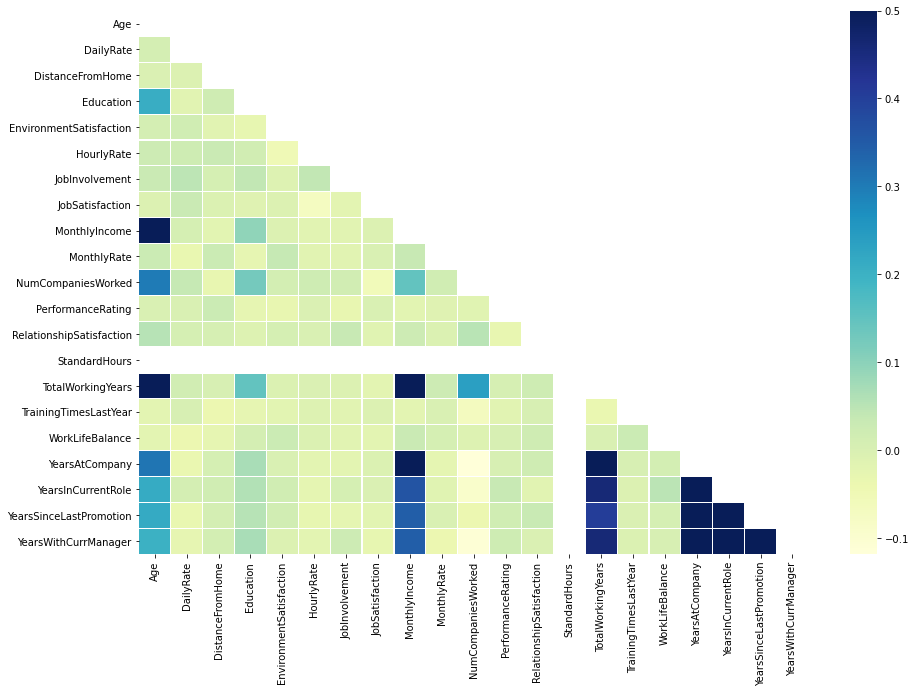

In [5]:
# Calculate correlations
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")



**1.1.1. Write three interesting observation that you notice. Were they as you  expected ? Please elaborate your answer in 1 - 3 sentences. (0.4 points)**

"Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

**1.1.2 Make a boxplot for total working years for each type of Attrition values. (0.4 points)**

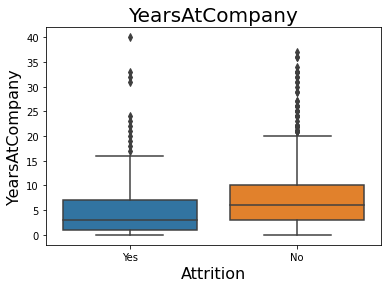

In [6]:
sns.boxplot(data['Attrition'], data['YearsAtCompany'])
plt.title('YearsAtCompany', fontsize=20)      
plt.xlabel('Attrition', fontsize=16)
plt.ylabel('YearsAtCompany', fontsize=16)
plt.show()


**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.4 points)**

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


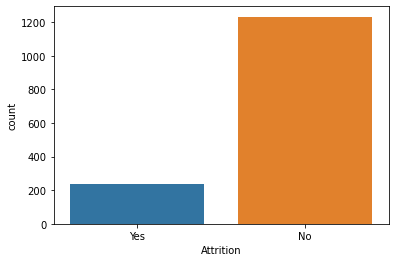

In [7]:
data['Attrition'].value_counts()
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

sns.countplot(data['Attrition'])
plt.show()

## 1.2 Classification  (6.4 points)

We are going to predict the variable Attrition by trying different classification algorithms and comparing them. Before let's split the data into training and test set. Hint: You can apply some preprocessing as well to get better results.

In [8]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

#This function is used to convert Categorical values to Numerical values
data=pd.get_dummies(data)

data.head()
feats = data.columns
feats = feats.drop('Attrition')


In [9]:
#Separating Feature and Target matrices
X = data.drop(['Attrition'], axis=1)

y=data['Attrition']
scale = StandardScaler()
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**1.2.1 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [10]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

model=DecisionTreeClassifier()
Model = "DecisionTreeClassifier"

model.fit(X_train,y_train) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction

accuracy_score(y_test, y_pred)

0.7687074829931972

**1.2.2 Plot the confusion matrix for the predicted values. Based on this matrix or your general knowledge, why accuracy is not a good metric to use in this case ? (0.4 points)**

[[213  32]
 [ 36  13]]


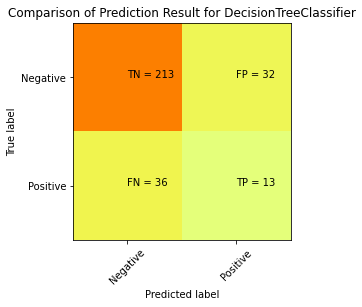

Accuracy of the Model DecisionTreeClassifier 76.9%


In [11]:
from sklearn.metrics import confusion_matrix
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


cm = confusion_matrix(y_test,y_pred)
print (cm)

cm_plot(cm,Model)
accuracy = round(100*np.trace(cm)/np.sum(cm),1)
print('Accuracy of the Model' ,Model, str(accuracy)+'%')

#When we use accuracy, we assign equal cost to false positives and false negatives.
# When that data set is imbalanced - say it has 99% of instances in one class and only 1 % in the other - 
# there is a great way to lower the cost. Predict that every instance belongs to the majority class, get 
# accuracy of 99% and go home early.Same is the case here as the Attrition class is not evenly distributed. 
# So we don't use an absolute measure (accuracy) but a relative-to-each-class measure

**1.2.4 It is possible to plot the decision tree by using different plotting libraries. We are using the https://pypi.org/project/graphviz/ and sklearn.tree. Install the package and complete the code below so you will get a visualisation of our decision tree. (0.4 points)**

In [18]:
#!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
dot_prod = export_graphviz(model, out_file=None, feature_names=list(d),
                class_names=True, filled=True, rounded=True,
                special_characters=False)
graph = graphviz.Source(dot_prod)
graph

NameError: name 'd' is not defined

**1.2.5 For the decision tree we modeled, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

**<font color='red'>Answer 1: As evident from the decision tree plot, Total Working years is the most important factor</font>** 

**1.2.6 Plot the classification report for the decision tree. In this case study which one out of  precision and recall, would you consider more important ? Please elaborate your answer. (0.4 points)**

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       245
           1       0.29      0.27      0.28        49

    accuracy                           0.77       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.76      0.77      0.76       294

classes ['0', '1']
plotMat [[0.86, 0.87, 0.86], [0.29, 0.27, 0.28]]


Text(0.5, 5.460738687091549, 'Measures')

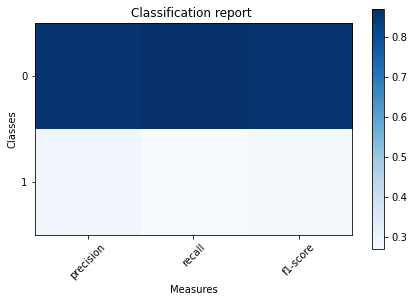

In [19]:
print(classification_report(y_test, y_pred))
# Recall is important since it expresses the ability to find all relevant instances in a dataset and is very important that
# all in our dataset who are going to leave should be recognized so that means that our model needs to have a high recall.


#########PLOT##########
cr = classification_report(y_test, y_pred)
title='Classification report '
with_avg_total=False
cmap=plt.cm.Blues

lines = cr.split('\n')
# lines
classes = []
plotMat = []
for line in lines[2 : 4]:
#     print("line", line)
    t = line.split()
#     print("t:", t)
    classes.append(t[0])
    v = [float(x) for x in t[1: len(t) - 1]]
#     print("v:", v)
    plotMat.append(v)

print ("classes", classes)
print ("plotMat", plotMat)

if with_avg_total:
    aveTotal = lines[len(lines) - 1].split()
    classes.append('avg/total')
    vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
    plotMat.append(vAveTotal)


plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
x_tick_marks = np.arange(3)
y_tick_marks = np.arange(len(classes))
plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
plt.yticks(y_tick_marks, classes)
plt.tight_layout()
plt.ylabel('Classes')
plt.xlabel('Measures')

**1.2.7 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the effect happening ? (0.4 points)**

In [20]:
f1_score(y_train, model.predict(X_train), average='weighted')

# Since our model was trained on training data, and it has learnt it well, therefore we get a prefect F1 score.

1.0

**<font color='red'>Answer 1:</font>** 

**1.2.8 We can use cross validation scores to ensure that our model is generalizing well and we can be more confident when we apply it in test data. We will now try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.4 points)**

In [21]:
best_score = 0
best_depth = 0
for i in range(5,20):
    clf = DT(max_depth=i, random_state = 0)
    # Perform 5-fold cross validation. 
    # The number of folds you want to use generally depends from the size of data
    scores = cross_val_score(estimator= clf, scoring="f1", X=X_train, y=y_train, cv=5)
    mean_score = sum(scores) / len(scores)

    if mean_score > best_score:
        best_score =mean_score;
        best_depth = i
    

    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )
print('\n The best tree score is: ', best_score )

Mean score 0.33598920178585845
Mean score 0.3311249166361249
Mean score 0.3152495964563039
Mean score 0.3556658377958783
Mean score 0.3412140082598124
Mean score 0.34591319128632564
Mean score 0.3327594606462812
Mean score 0.3274482750075548
Mean score 0.3425828070895417
Mean score 0.324063733646173
Mean score 0.33206983817526564
Mean score 0.32797701117104616
Mean score 0.33273891593295096
Mean score 0.33273891593295096
Mean score 0.33273891593295096

 The best tree depth is:  8

 The best tree score is:  0.3556658377958783


**1.2.9 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [22]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC(random_state=0) #Create the Model

model.fit(X_train,y_train) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction
print ("Accuracy Score is: ", accuracy_score(y_test, y_pred))
print("Classification Matrix is: ",classification_report(y_test, y_pred))
print("AUC score is: ", roc_auc_score(y_test, y_pred))

Accuracy Score is:  0.8673469387755102
Classification Matrix is:                precision    recall  f1-score   support

           0       0.87      0.99      0.93       245
           1       0.86      0.24      0.38        49

    accuracy                           0.87       294
   macro avg       0.86      0.62      0.65       294
weighted avg       0.87      0.87      0.83       294

AUC score is:  0.6183673469387755


**1.2.10 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [23]:
Model = "LogisticRegression"
model=LogisticRegression(random_state=0)

model.fit(X_train,y_train) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction
print (accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.8877551020408163
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       245
           1       0.77      0.47      0.58        49

    accuracy                           0.89       294
   macro avg       0.83      0.72      0.76       294
weighted avg       0.88      0.89      0.88       294



0.7204081632653062

**1.2.11 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.4 points)**


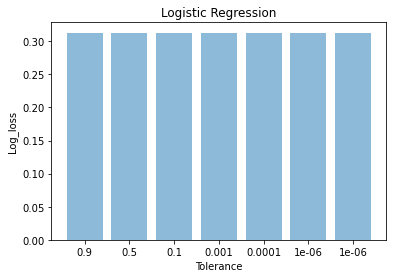

In [24]:
from sklearn.linear_model import LogisticRegression as LR

log_loss = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    lr = LR(tol = tol, random_state = 0 );
    lr.fit(X_train,y_train); #Train the Model
    
    y_pred = lr.predict_proba(X_test); #Use the Model for prediction
    y_pred = y_pred[:,1];
    a = metrics.log_loss(y_test, y_pred);
    log_loss.append(a)
    
log_loss
tolerance=  [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001];


y_pos = np.arange(len(tolerance))
plt.bar(y_pos, log_loss, align='center', alpha=0.5)
plt.xticks(y_pos, tolerance)
plt.ylabel('Log_loss')
plt.xlabel('Tolerance')
plt.title('Logistic Regression') 

plt.show()

**<font color='red'>Answer 1: Based on log loss, tolerance of 0.5 is better due to slightly better performance</font>** 


**1.2.12 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [25]:
Model = "RandomForestClassifier"
model=RandomForestClassifier(random_state=0)

model.fit(X_train,y_train) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction
# y_pred
print ("Accuracy Score is: ", accuracy_score(y_test, y_pred))
print("Classification Matrix is: ",classification_report(y_test, y_pred))
print("AUC score is: ", roc_auc_score(y_test, y_pred))

Accuracy Score is:  0.8605442176870748
Classification Matrix is:                precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       0.90      0.18      0.31        49

    accuracy                           0.86       294
   macro avg       0.88      0.59      0.61       294
weighted avg       0.87      0.86      0.82       294

AUC score is:  0.5897959183673469


**1.2.13 Get the probabilities for each class from Random Forest model. Threshold the probabilities such that it will output the class No  only if the model is 70% or higher confident. In all other cases it will predict the class Yes. (0.4 points)**


In [26]:
y_pred = model.predict_proba(X_test) #Use the Model for prediction
# y_pred
ThresholdedPred = np.array(y_pred[:,0])

ThresholdedPred[ThresholdedPred >= 0.7] = 0 #first label all observations as No if model is confident 70%
ThresholdedPred[ThresholdedPred > 0] = 1  #label other as Yes

**1.2.14 Build again the classification matrix. Do you think there were some improvements regarding the classification for class Yes ? Explain your answer briefly. (0.4 points)**

In [27]:
print ("Accuracy Score is: ", accuracy_score(y_test, ThresholdedPred))
print("Classification Matrix is: ",classification_report(y_test, ThresholdedPred))
print("AUC score is: ", roc_auc_score(y_test, ThresholdedPred))


Accuracy Score is:  0.8299319727891157
Classification Matrix is:                precision    recall  f1-score   support

           0       0.89      0.91      0.90       245
           1       0.49      0.43      0.46        49

    accuracy                           0.83       294
   macro avg       0.69      0.67      0.68       294
weighted avg       0.82      0.83      0.83       294

AUC score is:  0.6693877551020408


**<font color='red'>Answer 1: As it can be seen there are some improvements regarding the classification for class Yes as recall has increased from 0.18 to 0.43. This is due to fact that we are reducing the effect of overfitting of our model on No classes by setting a high confidence threshold.</font>** 

**1.2.15 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.4 points)**

In [44]:
#!pip install xgboost
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

model.fit(X_train,y_train) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction

print ("Accuracy Score is: ", accuracy_score(y_test, y_pred))
print("Classification Matrix is: ",classification_report(y_test, y_pred))
print("AUC score is: ", roc_auc_score(y_test, y_pred))

[16:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score is:  0.8503401360544217
Classification Matrix is:                precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.62      0.27      0.37        49

    accuracy                           0.85       294
   macro avg       0.74      0.62      0.64       294
weighted avg       0.83      0.85      0.82       294

AUC score is:  0.616326530612245


**1.2.16 Based on your answer from 1.2.6 and other important evaluation metrics for unbalanced datasets, choose the best classifier and plot its feature importances in decreasing order. Were the 3 most important features as you expected ? Please explain why. (0.4 points)**

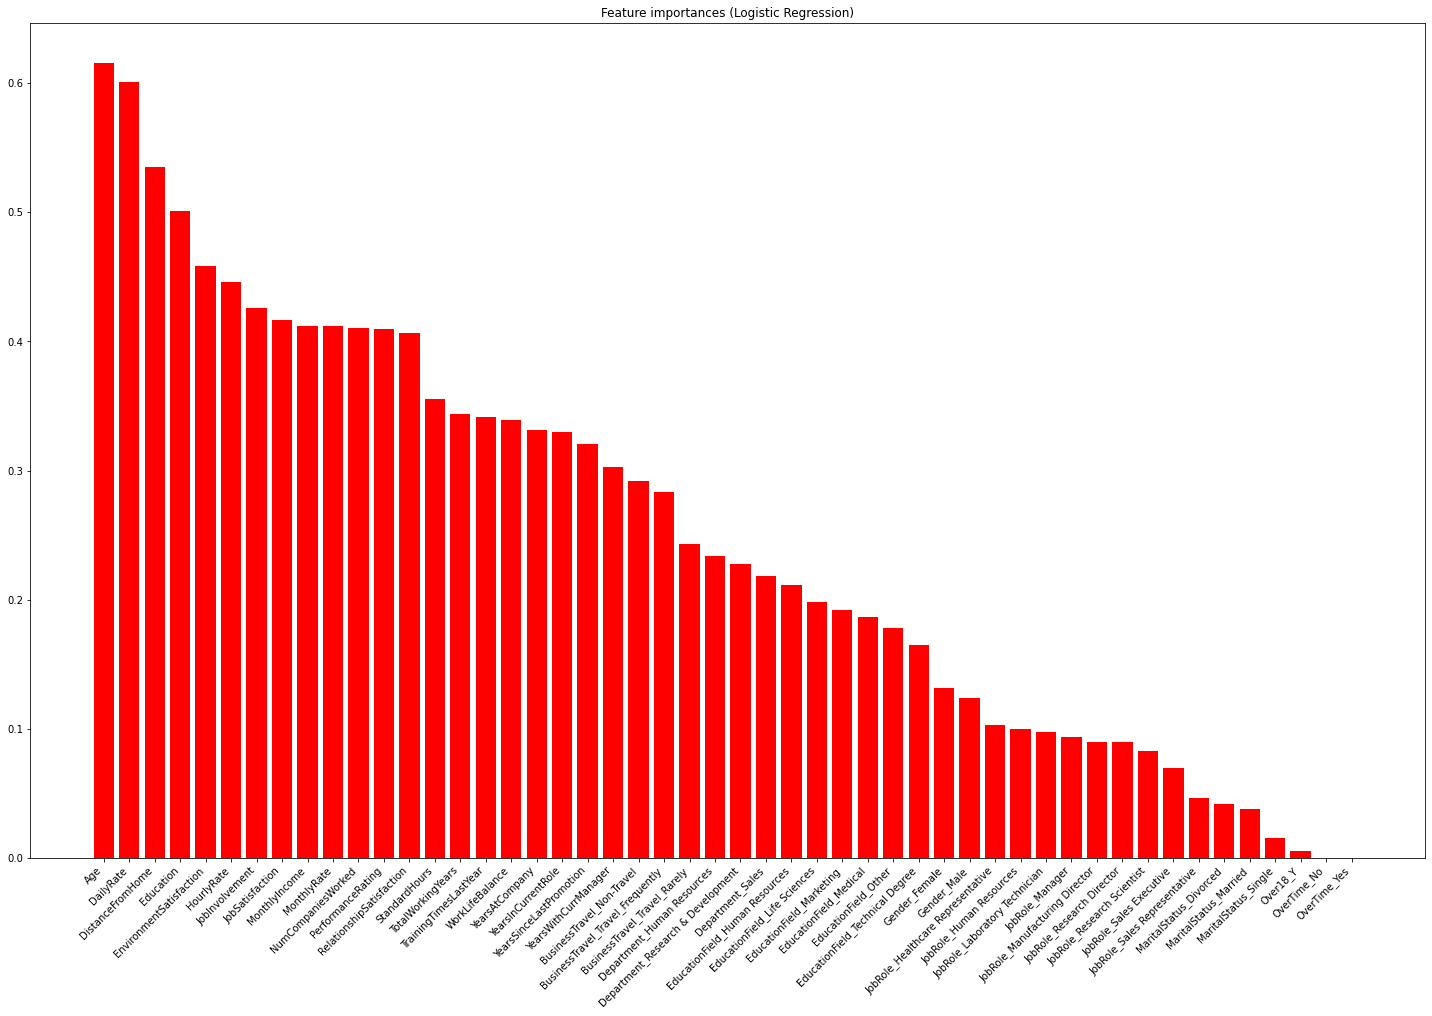

In [32]:
# Since we are getting 0.89 weighted average logistic regression score, so it is our best model.
X_train.shape[1]
Model = "LogisticRegression"
model=LogisticRegression(random_state=0)

clf = model.fit(X_train,y_train) #Train the Model
importances = np.abs(clf.coef_[0])
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]
# feats
names = [feats[i] for i in indices]
# names

plt.figure(num=None, figsize=(25, 20))
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(50), coefs[indices[:50]],
       color="r", align="center")
plt.xticks(range(50), feats, rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

**<font color='red'>Answer 1: Age, DailyRate and Distance from home are the most important fetaures. These are as expected since employees retire when they get old, their wage is the second most important factor, since good salary is important for retention and Distance from home being the third.</font>** 

# 2. Improving classification (2 points)

In this task we will try to improve the performance of the best classifier you selected on 1.2.12 by using several techniques. 

In [46]:
# sklearn modules for preprocessing
#!pip install imblearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE  # SMOTE
from imblearn.under_sampling import RandomUnderSampler
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer 1: Due to imbalncing of data it is better to do downsample the Yes class and over sample the No class</font>** 

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [47]:
smote=SMOTE(random_state = 0)
X_sm, y_sm=smote.fit_sample(X,y)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [48]:
#logistic Regression for OverSampled Data 
Model = "LogisticRegression"
model=LogisticRegression(random_state=0)

model.fit(X_train_sm,y_train_sm) #Train the Model
y_pred_sm = model.predict(X_test_sm) #Use the Model for prediction
print (accuracy_score(y_test_sm, y_pred_sm))
print(classification_report(y_test_sm, y_pred_sm))
roc_auc_score(y_test_sm, y_pred_sm)


0.8036437246963563
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       231
           1       0.80      0.84      0.82       263

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494



0.8013678336872253

**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

In [49]:
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus=rus.fit_sample(X,y)
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.2,random_state=0)

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [50]:
#logistic Regression for OverSampled Data 
Model = "LogisticRegression"
model=LogisticRegression(random_state=0)

model.fit(X_train_rus,y_train_rus) #Train the Model
y_pred_rus = model.predict(X_test_rus) #Use the Model for prediction
print (accuracy_score(y_test_rus, y_pred_rus))
print(classification_report(y_test_rus, y_pred_rus))
roc_auc_score(y_test_rus, y_pred_rus)


0.7789473684210526
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        50
           1       0.74      0.82      0.78        45

    accuracy                           0.78        95
   macro avg       0.78      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95



0.7811111111111111